In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
from fashionmnist_downloader import download_fashion_mnist
data_dir = './fashion_mnist_data'
train_images, train_labels, test_images, test_labels = download_fashion_mnist(data_dir)


In [8]:
# Normalize pixel values
train_images_normalized = train_images_flat / 255.0
test_images_normalized = test_images_flat / 255.0

# Verify normalization
print(f"Max pixel value after normalization: {np.max(train_images_normalized)}")
print(f"Min pixel value after normalization: {np.min(train_images_normalized)}")


Max pixel value after normalization: 1.0
Min pixel value after normalization: 0.0


In [10]:
print(f"Data type of train images: {train_images.dtype}")
print(f"Data type of train labels: {train_labels.dtype}")

Data type of train images: uint8
Data type of train labels: uint8


In [11]:
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


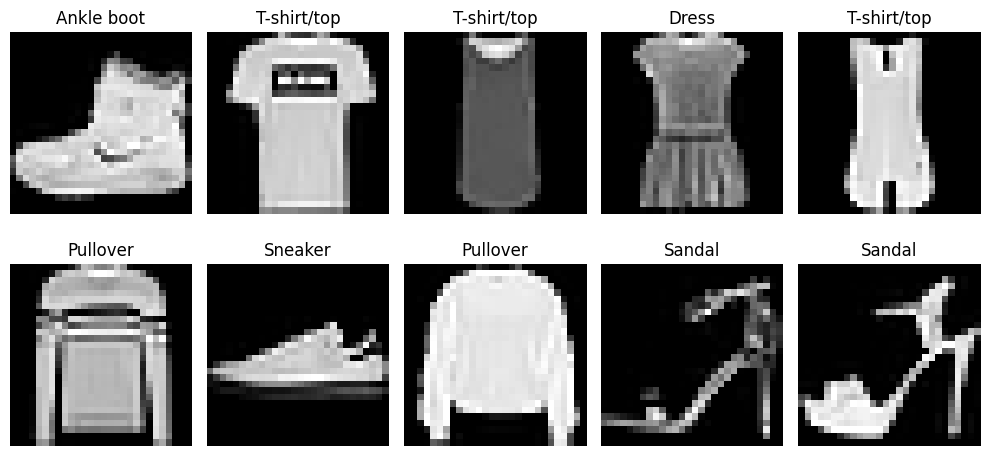

In [13]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Display the first 10 training images with labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

Class Distribution:
T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


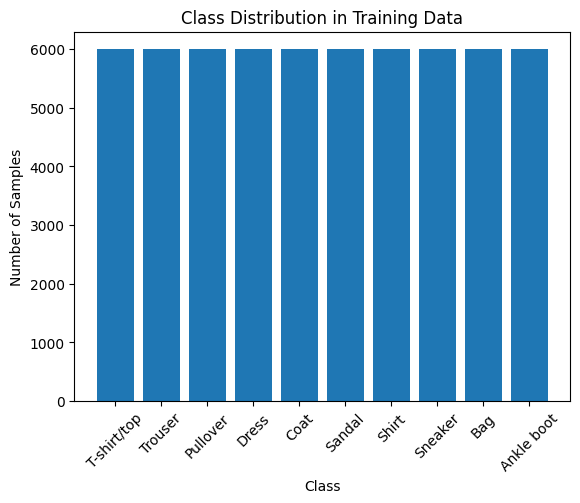

In [14]:
unique, counts = np.unique(train_labels, return_counts=True)
class_distribution = dict(zip(class_names, counts))

# Print class distribution
print("Class Distribution:")
for label, count in class_distribution.items():
    print(f"{label}: {count}")

# Visualize class distribution
plt.bar(class_names, counts)
plt.title("Class Distribution in Training Data")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

In [15]:
train_mean = np.mean(train_images)
train_std = np.std(train_images)
train_min = np.min(train_images)
train_max = np.max(train_images)

print(f"Mean pixel value: {train_mean:.2f}")
print(f"Standard deviation of pixel values: {train_std:.2f}")
print(f"Minimum pixel value: {train_min}")
print(f"Maximum pixel value: {train_max}")


Mean pixel value: 72.94
Standard deviation of pixel values: 90.02
Minimum pixel value: 0
Maximum pixel value: 255


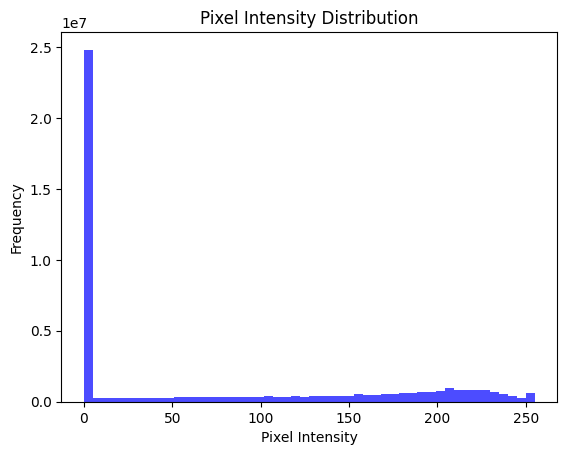

In [16]:
flattened_images = train_images.reshape(-1)

# Plot histogram of pixel intensities
plt.hist(flattened_images, bins=50, color='blue', alpha=0.7)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

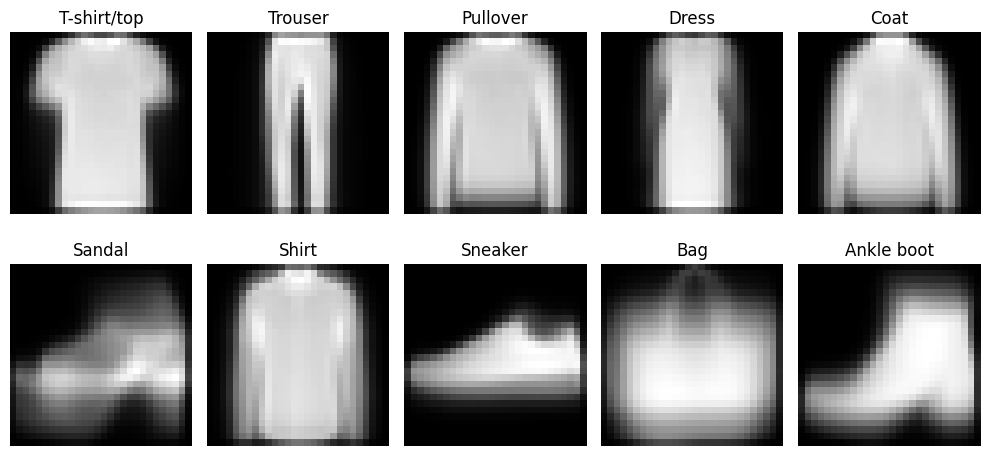

In [17]:
plt.figure(figsize=(10, 5))
for i in range(10):
    class_indices = np.where(train_labels == i)[0]
    avg_image = np.mean(train_images[class_indices], axis=0)

    plt.subplot(2, 5, i + 1)
    plt.imshow(avg_image, cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
# Check for NaN or corrupted data
print(f"Any NaN values in train images: {np.isnan(train_images).any()}")
print(f"Any NaN values in test images: {np.isnan(test_images).any()}")
print(f"Any corrupted data in train images (negative or >255): {(train_images < 0).any() or (train_images > 255).any()}")

# Check label range
print(f"Unique labels in train set: {np.unique(train_labels)}")
print(f"Unique labels in test set: {np.unique(test_labels)}")


Any NaN values in train images: False
Any NaN values in test images: False
Any corrupted data in train images (negative or >255): False
Unique labels in train set: [0 1 2 3 4 5 6 7 8 9]
Unique labels in test set: [0 1 2 3 4 5 6 7 8 9]


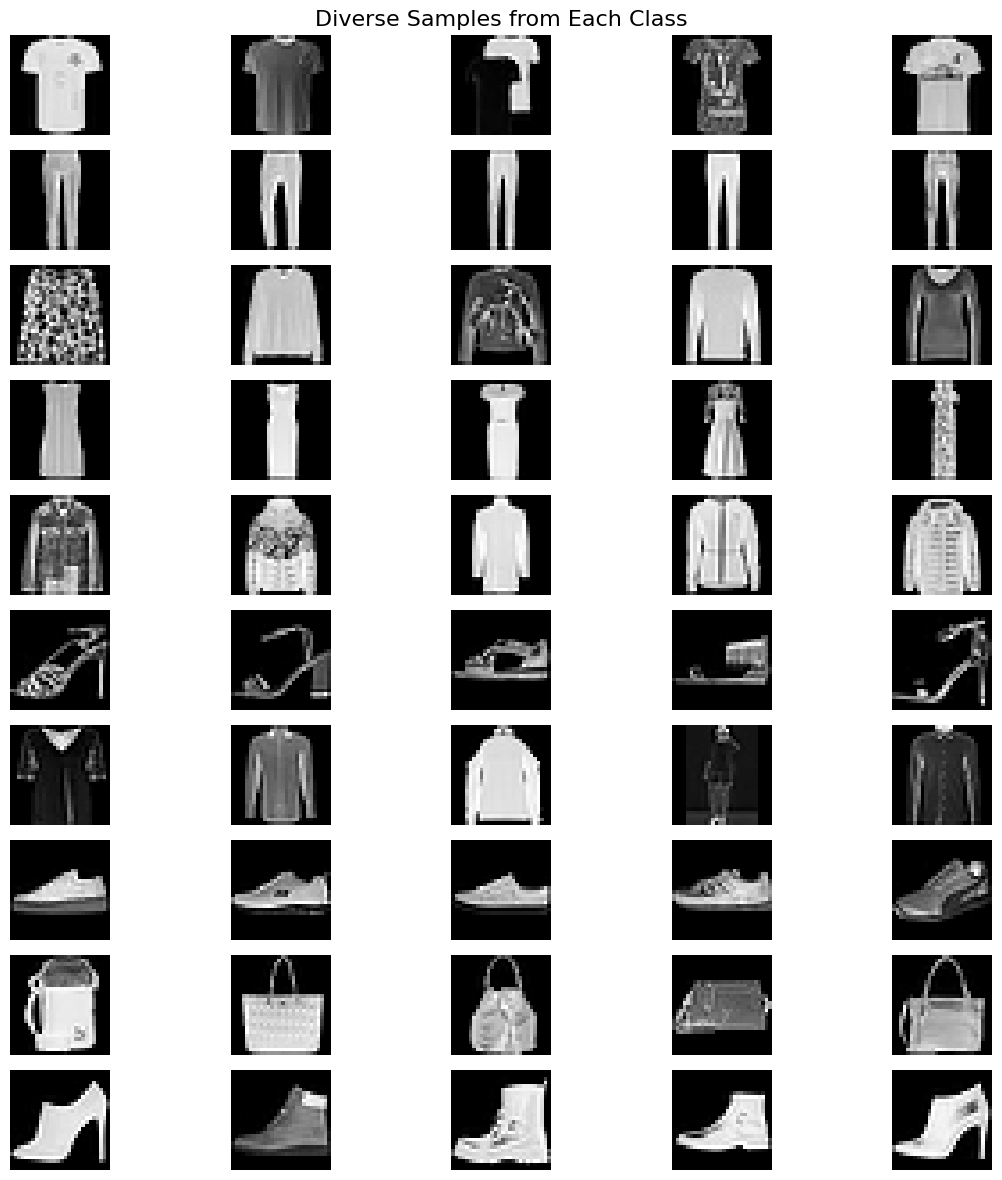

In [22]:
# Display diverse samples from each class
plt.figure(figsize=(12, 12))
for class_label in range(10):
    class_indices = np.where(train_labels == class_label)[0]
    selected_indices = np.random.choice(class_indices, 5, replace=False)
    for i, idx in enumerate(selected_indices):
        plt.subplot(10, 5, class_label * 5 + i + 1)
        plt.imshow(train_images[idx], cmap='gray')
        plt.axis('off')
plt.suptitle("Diverse Samples from Each Class", fontsize=16)
plt.tight_layout()
plt.show()


Number of outliers detected: 1399


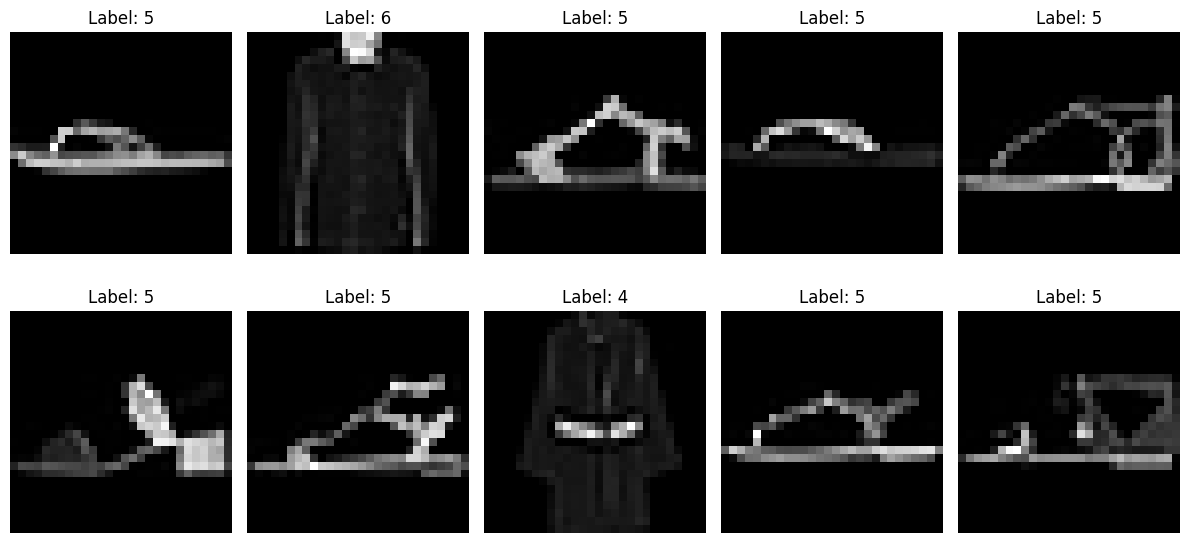

In [25]:
# Calculate pixel intensity mean and standard deviation for each image
image_means = train_images.reshape(train_images.shape[0], -1).mean(axis=1)
image_stds = train_images.reshape(train_images.shape[0], -1).std(axis=1)

# Identify potential outliers
outlier_indices = np.where((image_means < 20) | (image_stds < 5))[0]
print(f"Number of outliers detected: {len(outlier_indices)}")

# Visualize outliers
plt.figure(figsize=(12, 6))
for i, idx in enumerate(outlier_indices[:10]):  # Show first 10 outliers
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(f"Label: {train_labels[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


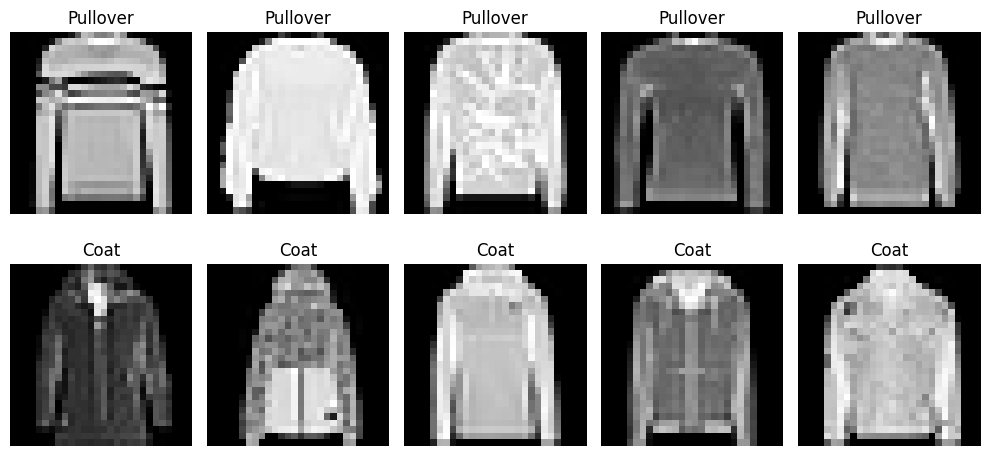

In [29]:
# Example: Check samples from two confusing classes
confusing_classes = [2, 4]  # Pullover vs Coat
confusion_samples = [np.where(train_labels == c)[0][:5] for c in confusing_classes]

# Visualize samples
plt.figure(figsize=(10, 5))
for i, class_samples in enumerate(confusion_samples):
    for j, idx in enumerate(class_samples):
        plt.subplot(2, 5, i * 5 + j + 1)
        plt.imshow(train_images[idx], cmap='gray')
        plt.title(class_names[confusing_classes[i]])
        plt.axis('off')
plt.tight_layout()
plt.show()


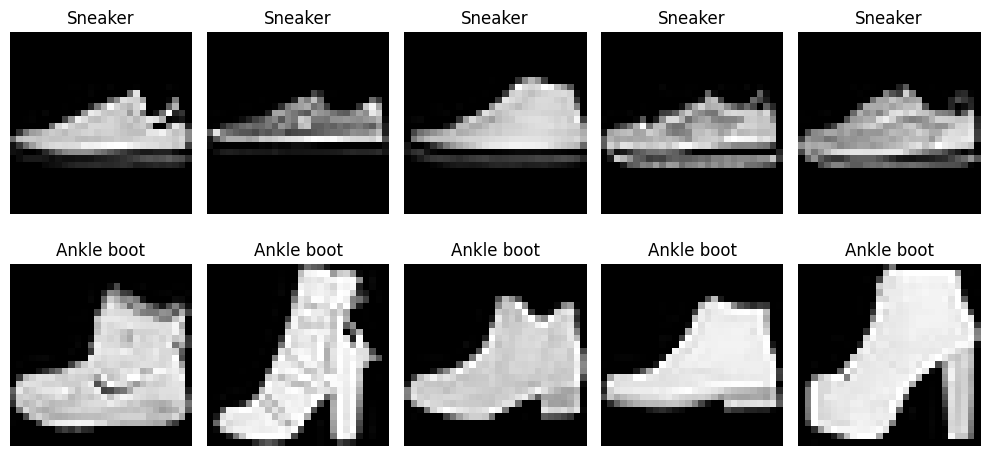

In [30]:
confusing_classes = [7, 9]  #sneakers vs akle boot
confusion_samples = [np.where(train_labels == c)[0][:5] for c in confusing_classes]

# Visualize samples
plt.figure(figsize=(10, 5))
for i, class_samples in enumerate(confusion_samples):
    for j, idx in enumerate(class_samples):
        plt.subplot(2, 5, i * 5 + j + 1)
        plt.imshow(train_images[idx], cmap='gray')
        plt.title(class_names[confusing_classes[i]])
        plt.axis('off')
plt.tight_layout()
plt.show()

In [31]:
from multiclass_regression import train_logistic_regression, predict, evaluate_model, plot_confusion_matrix


In [32]:
# Flatten the images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Normalize the pixel values
train_images_normalized = train_images_flat / 255.0
test_images_normalized = test_images_flat / 255.0


In [33]:
# Number of classes in FashionMNIST
num_classes = 10

# Train the logistic regression model
weights = train_logistic_regression(
    X=train_images_normalized, 
    y=train_labels, 
    num_classes=num_classes, 
    learning_rate=0.1, 
    epochs=100
)


In [34]:
# Evaluate on training data
train_accuracy = evaluate_model(train_images_normalized, train_labels, weights)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate on testing data
test_accuracy = evaluate_model(test_images_normalized, test_labels, weights)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 74.41%
Testing Accuracy: 72.94%
